### Problem 3

In [27]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve

from scikitplot.metrics import plot_roc

import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[df["Subtype"].isin(["Luminal A", "Luminal B"])]
X = df.iloc[:, :-1].to_numpy()
y = df.loc[:,"Subtype"].to_numpy()

In [29]:
df.head(3)

,UBE2T,BIRC5,NUF2,CDC6,CCNB1,TYMS,MYBL2,CEP55,MELK,NDC80,...,NAT1,FOXA1,BLVRA,MMP11,GPR160,FGFR4,GRB7,TMEM45B,ERBB2,Subtype
TCGA-A1-A0SD-01A,3.016158,2.514871,1.509129,1.354016,3.685035,2.125453,3.047474,2.333704,1.996853,1.171520,...,4.905805,6.677118,5.044878,5.631087,3.942169,3.404177,3.655783,2.757977,5.999041,Luminal A
TCGA-A1-A0SE-01A,4.626989,3.289047,2.102190,2.116975,4.525954,2.906470,3.798966,2.745027,2.451070,2.070499,...,6.053451,6.690114,5.843557,5.504526,3.881691,1.038253,3.156081,1.355837,5.585759,Luminal A
TCGA-A1-A0SF-01A,3.417782,2.262844,1.569301,1.800667,3.823694,2.843952,3.807282,2.141323,2.082400,1.693568,...,6.883599,6.280921,5.705410,3.511572,4.374803,2.299735,3.054917,1.315680,5.215699,Luminal A


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
print('The accuracy score is', accuracy_score(y_test, y_pred))
print('The balanced accuracy score is', balanced_accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

The accuracy score is 0.9194630872483222
The balanced accuracy score is 0.9056563951034191
[[97  6]
 [ 6 40]]


In [15]:
matr = confusion_matrix(y_test, y_pred)
TPR = matr[0, 0] / (matr[0, 0] + matr[0, 1])
TNR = matr[1, 1] / (matr[1, 0] + matr[1, 1])
print('TPR', TPR, '\n', 'TNR', TNR)

TPR 0.941747572815534 
 TNR 0.8695652173913043


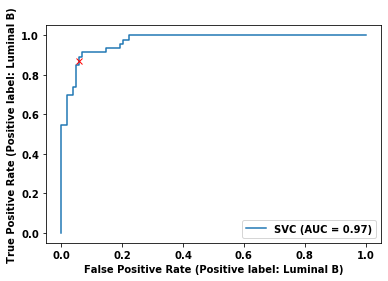

In [16]:
plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="red")

In [17]:
df=df.T.iloc[:-1,:]
df['coef']=model.coef_[0]
df=df.sort_values('coef',ascending=False)
print(df.index.tolist())

['BIRC5', 'ACTR3B', 'UBE2C', 'UBE2T', 'RRM2', 'SLC39A6', 'TYMS', 'MELK', 'CENPF', 'PTTG1', 'MYBL2', 'BLVRA', 'CDC6', 'CDC20', 'NUF2', 'ORC6', 'KRT5', 'CCNE1', 'MLPH', 'ANLN', 'EXO1', 'CDH3', 'CEP55', 'CCNB1', 'FOXA1', 'PGR', 'GPR160', 'KIF2C', 'MKI67', 'ESR1', 'TMEM45B', 'GRB7', 'NAT1', 'ERBB2', 'MMP11', 'MYC', 'EGFR', 'MAPT', 'NDC80', 'KRT14', 'SFRP1', 'PHGDH', 'FGFR4', 'BCL2', 'MDM2', 'FOXC1', 'CXXC5', 'KRT17', 'MIA', 'BAG1']


The accuracy score is 0.8389261744966443
The balanced accuracy score is 0.7932672013507809
[[94  9]
 [15 31]]
TPR 0.912621359223301 
 TNR 0.6739130434782609


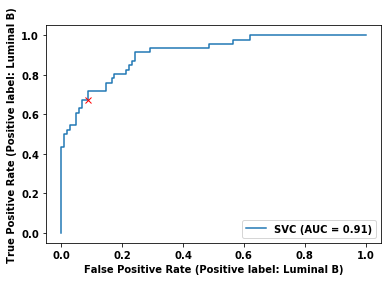

In [32]:
df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[df["Subtype"].isin(["Luminal A", "Luminal B"]),['BIRC5','ACTR3B','UBE2C','UBE2T','RRM2','Subtype']]
X = df.iloc[:, :-1].to_numpy()
y = df.loc[:,"Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('The accuracy score is', accuracy_score(y_test, y_pred))
print('The balanced accuracy score is', balanced_accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

matr = confusion_matrix(y_test, y_pred)
TPR = matr[0, 0] / (matr[0, 0] + matr[0, 1])
TNR = matr[1, 1] / (matr[1, 0] + matr[1, 1])
print('TPR', TPR, '\n', 'TNR', TNR)


plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="red")

Все показатели ухудшились, что и не удивительно, поскольку обучали не на полной выборке, а лишь на топ-5.

### Problem 4

In [33]:
df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
X = df.iloc[:, :-1].to_numpy()
y = df.loc[:,"Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('The accuracy score is', accuracy_score(y_test, y_pred))
print('The balanced accuracy score is', balanced_accuracy_score(y_test, y_pred))

M = confusion_matrix(y_test, y_pred)
print(M)

The accuracy score is 0.9126637554585153
The balanced accuracy score is 0.7822173561277613
[[15  0  0  1  0  0]
 [ 0 25  0  0  0  0]
 [ 0  0 98  5  0  0]
 [ 0  0  9 37  0  0]
 [ 0  1  3  0  0  1]
 [ 0  0  0  0  0 34]]


In [34]:
from sklearn.decomposition import PCA

df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
X = df.iloc[:, :-1].to_numpy()
y = df.loc[:,"Subtype"].to_numpy()

pca = PCA(n_components=2)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('The accuracy score is', accuracy_score(y_test, y_pred))
print('The balanced accuracy score is', balanced_accuracy_score(y_test, y_pred))

M = confusion_matrix(y_test, y_pred)
print(M)

The accuracy score is 0.8253275109170306
The balanced accuracy score is 0.6794233522873059
[[ 8  0  0  8  0  0]
 [ 0 20  4  0  1  0]
 [ 1  0 96  6  0  0]
 [ 1  0 14 31  0  0]
 [ 1  0  3  0  1  0]
 [ 1  0  0  0  0 33]]


### Problem 5

Time: --- 0.02692556381225586 seconds ---
The accuracy score is 1.0
The balanced accuracy score is 1.0
[[2500    0]
 [   0 2500]]
1.0 1.0


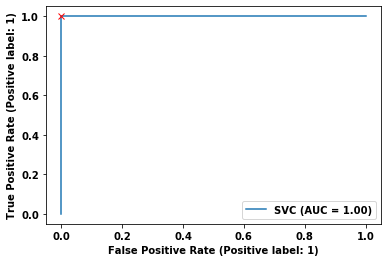

In [35]:
np.random.seed(17)

N = 10000
sample1_X1 = np.random.normal(loc=0, size=(N, 1))
sample1_X2 = np.random.normal(loc=0, size=(N, 1))
sample2_X1 = np.random.normal(loc=10, size=(N, 1))
sample2_X2 = np.random.normal(loc=10, size=(N, 1))

X1=[]
for i in sample1_X1:
    X1.append(float(i))
for i in sample2_X1:
    X1.append(float(i))
X2=[]
for i in sample1_X2:
    X2.append(float(i))
for i in sample2_X2:
    X2.append(float(i))
    
X = pd.DataFrame({
    'X1': X1,
    'X2': X2
})

X = X.to_numpy()
y = np.array([0]*N + [1]*N)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

import time
start_time = time.time()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Time:', "--- %s seconds ---" % (time.time() - start_time))

print('The accuracy score is', accuracy_score(y_test, y_pred))
print('The balanced accuracy score is', balanced_accuracy_score(y_test, y_pred))

M = confusion_matrix(y_test, y_pred)
print(M)

TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="red")

Time: --- 26.860628366470337 seconds ---
The accuracy score is 0.4934
The balanced accuracy score is 0.49339999999999995
[[1271 1229]
 [1304 1196]]
0.5084 0.4784


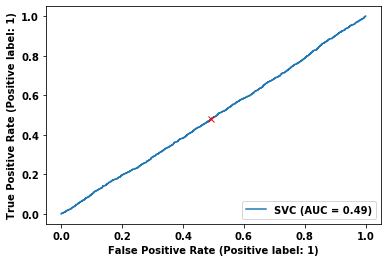

In [36]:
# TPR, TNR
np.random.seed(17)

N = 10000
sample1_X1 = np.random.normal(loc=0, size=(N, 1))
sample1_X2 = np.random.normal(loc=0, size=(N, 1))
sample2_X1 = np.random.normal(loc=0, size=(N, 1))
sample2_X2 = np.random.normal(loc=0, size=(N, 1))

X1=[]
for i in sample1_X1:
    X1.append(float(i))
for i in sample2_X1:
    X1.append(float(i))
X2=[]
for i in sample1_X2:
    X2.append(float(i))
for i in sample2_X2:
    X2.append(float(i))
    
X = pd.DataFrame({
    'X1': X1,
    'X2': X2
})

X = X.to_numpy()
y = np.array([0]*N + [1]*N)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

import time
start_time = time.time()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Time:', "--- %s seconds ---" % (time.time() - start_time))

print('The accuracy score is', accuracy_score(y_test, y_pred))
print('The balanced accuracy score is', balanced_accuracy_score(y_test, y_pred))

M = confusion_matrix(y_test, y_pred)
print(M)

TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="red")